In [49]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/2b/wl_6n2k90f1fg30fw735f9sh0000gn/T/ipykernel_16655/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [54]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Meadsurement = Base.classes.measurement
Station = Base.classes.station

/var/folders/2b/wl_6n2k90f1fg30fw735f9sh0000gn/T/ipykernel_16655/604039062.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [57]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [58]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

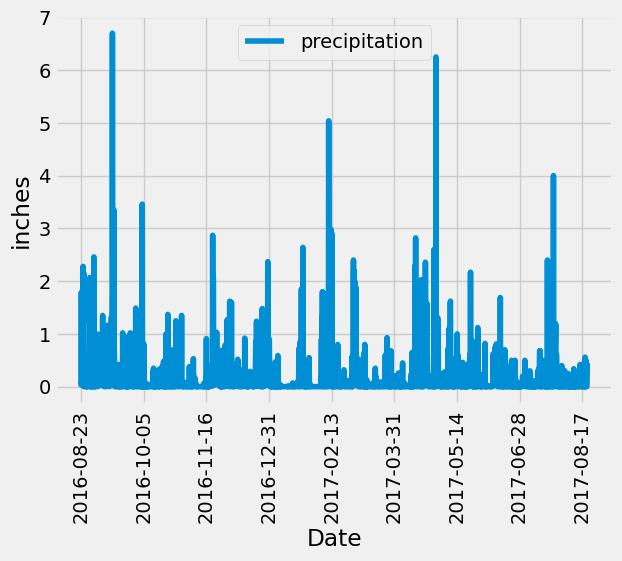

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
one_year_ago = pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)

# Convert the Timestamp object to a string in "YYYY-MM-DD" format
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precipt_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago_str).all()
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipt_df = pd.DataFrame(precipt_data, columns=["date", "precipitation"]).set_index("date")

# Sort the dataframe by date
precipt_df = precipt_df.sort_values(by="date").dropna()

# Use Pandas Plotting with Matplotlib to plot the data
precipt_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('inches')
plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipt_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station.id).count()
station_count_print = [(station_count,)]
station_count_print

[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()


[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

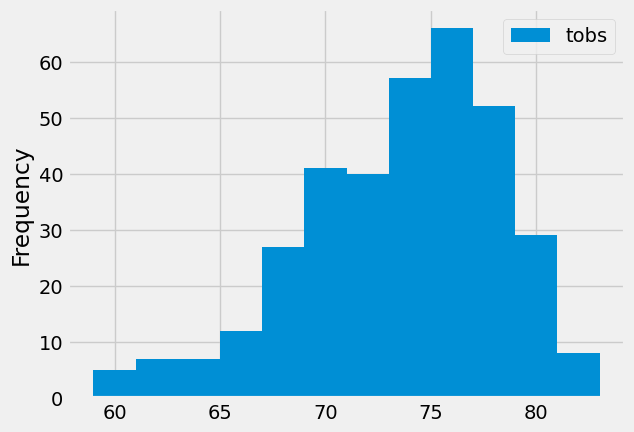

In [64]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_highest_obs = station_activity[0][0]

results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= "2016-08-24").\
                        filter(Measurement.date <= "2017-08-23").\
                        filter(Measurement.station == station_highest_obs).all()

# Convert to dataframe
results_df = pd.DataFrame(results)

# Histogram
results_df.plot.hist(bins=12)

# Close Session

In [65]:
# Close Session
session.close()